<b>Linear Regression with Gradient Descent</b>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

Class to calculate Gradient Descent

In [4]:
class MiniML:
    
    __hypothesis = None
    
    def __init__(self):
        print("MiniML")
        
    def linearEquation(self,X,W):
        self.__hypothesis = X @ W.T
        return self.__hypothesis
        
    def calculateCost(self,X,Y,W,lamda=0):
        inner = np.power(((self.linearEquation(X,W))-Y),2) + (lamda * np.sum(np.power(W,2)))
        return (np.sum(inner)/(2*len(X)))
    
    
    def linearRegression(self,X,Y,W,alpha,lamda,max_iterations):
        cost = np.zeros(max_iterations)
        
        for i in range(max_iterations):
            W = W - (alpha/len(X)) * (np.sum(X * (X @ W.T - Y), axis=0)+(lamda * W))
            cost[i] = self.calculateCost(X,Y,W,lamda)
            if(i % 1000 == 0):
                print("Cost", cost[i])
                
        return W,cost
    
    def getHypothesis(self):
        return self.__hypothesis
    
    def train(self,X,Y,W,alpha,max_iterations,lamda=0):
        return self.linearRegression(X,Y,W,alpha,lamda,max_iterations)
    
    def validate(self,X,Y,W):
        return self.calculateCost(X,Y,W)
    
    def test(self,X,Y,W):
        return self.validate(X,Y,W)

In [5]:
boston = load_boston()
bostonData = pd.DataFrame(boston.data)
bostonData.columns = boston.feature_names
bostonData['PRICE'] = boston.target
bostonData = (bostonData - bostonData.mean()) / bostonData.std()
bostonData.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,-0.417300,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499,0.159528
1,-0.414859,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953,-0.101424
2,-0.414861,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532,1.322937
3,-0.414270,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171,1.181589
4,-0.410003,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487,1.486032


In [6]:
Y = bostonData.iloc[:,13:14].values
X = bostonData.iloc[:,0:13]
ones = np.ones([len(X),1])
X = np.concatenate((ones,X), axis = 1)
print(X.shape)
print(Y.shape)
X_train, X_rest, Y_train, Y_rest = train_test_split(X,Y,test_size=0.4)
X_test,X_validate,Y_test,Y_validate = train_test_split(X_rest,Y_rest,test_size=0.5)
print('Training Data: \t',len(X_train))
print('Validation Data: \t',len(X_validate))
print('Test Data: \t',len(X_test))

(506, 14)
(506, 1)
Training Data: 	 303
Validation Data: 	 102
Test Data: 	 101


In [68]:
alpha = 0.001 # Learning Rate
lamda = 0.1 # regularization rate
max_iterations = 10000
W = np.zeros((1,len(X_train[0,:])))

In [69]:
miniML = MiniML()
Weight, Cost = miniML.train(X_train,Y_train,W,alpha,max_iterations,lamda)

MiniML
Cost 0.5273420327082352
Cost 0.17618697341841721
Cost 0.16383825215983563
Cost 0.16167954435101745
Cost 0.160730650202904
Cost 0.16027503016383585
Cost 0.16015278687842655
Cost 0.16025692880808143
Cost 0.16050803811242348
Cost 0.160849751211286


       Theta
0   0.010339
1  -0.111779
2   0.154122
3  -0.066044
4   0.115491
5  -0.153139
6   0.246629
7   0.013243
8  -0.322798
9   0.179998
10 -0.104831
11 -0.206440
12  0.070686
13 -0.440643


Text(0.5,1,'Prices vs predicted prices: $Y_i$ vs $\\hat{y}_i$ (Training)')

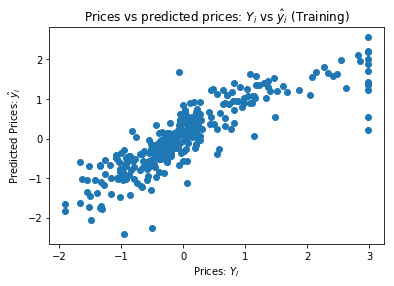

In [70]:
w = Weight.flatten()
pandasW = pd.DataFrame(Weight.T)
pandasW.columns = ["Theta"]
print(pandasW)
plt.scatter(Y_train,miniML.getHypothesis())
plt.xlabel("Prices: $Y_I$")
plt.ylabel("Predicted Prices: $\hat{y}_i$")
plt.title("Prices vs predicted prices: $Y_i$ vs $\hat{y}_i$ (Training)")
# plt.plot(bostonData.RM,(w[6]*bostonData.RM)+w[0],color='r')

In [71]:
print('Cost')
print('')
print("Training Cost \t\t", Cost[len(Cost)-1])
print('')


Cost

Training Cost 		 0.1612428504426053



Validation Cost 	 0.1513448456213892



Text(0.5,1,'Prices vs predicted prices: $Y_i$ vs $\\hat{y}_i$ (Validation)')

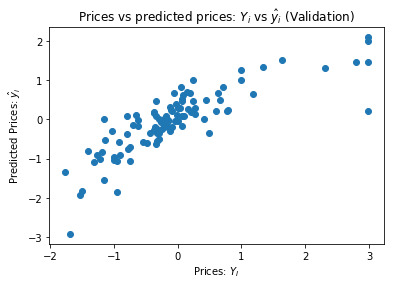

In [72]:
cost_validation = miniML.validate(X_validate,Y_validate,Weight)
print("Validation Cost \t",cost_validation)
print('')
plt.scatter(Y_validate,miniML.getHypothesis())
plt.xlabel("Prices: $Y_I$")
plt.ylabel("Predicted Prices: $\hat{y}_i$")
plt.title("Prices vs predicted prices: $Y_i$ vs $\hat{y}_i$ (Validation)")

Test Cost 		 0.10997238715613794


Text(0.5,1,'Prices vs predicted prices: $Y_i$ vs $\\hat{y}_i$ (Test)')

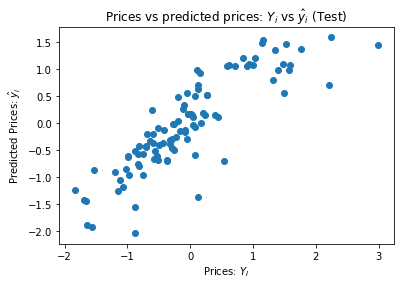

In [76]:
cost_test = miniML.test(X_test,Y_test,Weight)
print("Test Cost \t\t",cost_test)
plt.scatter(Y_test,miniML.getHypothesis())
plt.xlabel("Prices: $Y_I$")
plt.ylabel("Predicted Prices: $\hat{y}_i$")
plt.title("Prices vs predicted prices: $Y_i$ vs $\hat{y}_i$ (Test)")